In [2]:
# For data prep
import numpy as np
# For data visualization
import random
import matplotlib.pyplot as plt
%matplotlib inline
# For model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data

In [3]:
# Data
X_train = np.loadtxt('data/input.csv', delimiter=',')
Y_train = np.loadtxt('data/labels.csv', delimiter=',')
X_test = np.loadtxt('data/input_test.csv', delimiter=',')
Y_test = np.loadtxt('data/labels_test.csv', delimiter=',')

# Data Prep

In [4]:
# Reshape
training_samples = X_train.shape[0]
X_train = X_train.reshape(training_samples, 100, 100, 3).astype('float32') # 100x100 RGB images
test_samples = X_test.shape[0]
X_test = X_test.reshape(test_samples, 100, 100, 3).astype('float32')

# Normalize
X_train /= 255 # Max RGB value is 255
X_test /= 255

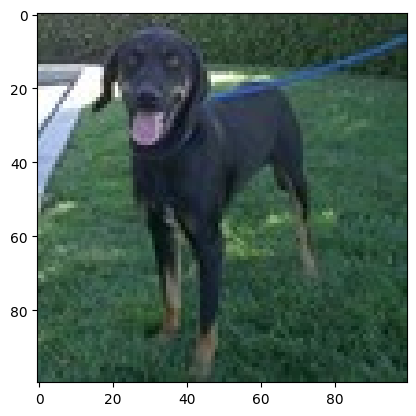

In [7]:
# Visualize a random sample
sample = random.randint(0, training_samples)
plt.imshow(X_train[sample])

# Model

In [21]:
# Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train

In [22]:
# Train
model.fit(X_train, Y_train, epochs=15, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.5047 - loss: 0.9326 - val_accuracy: 0.5500 - val_loss: 0.6882
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.5393 - loss: 0.6852 - val_accuracy: 0.6325 - val_loss: 0.6823
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.6527 - loss: 0.6640 - val_accuracy: 0.5775 - val_loss: 0.6706
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6491 - loss: 0.6282 - val_accuracy: 0.6650 - val_loss: 0.6103
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6963 - loss: 0.5837 - val_accuracy: 0.6675 - val_loss: 0.6030
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.7562 - loss: 0.4992 - val_accuracy: 0.6975 - val_loss: 0.5659
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7913 - loss: 0.4681 - val_accuracy: 0.6750 - val_loss: 0.5916
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.8390 - loss: 0.3850 - val_accuracy: 0.

# Test

In [23]:
# Test
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7557 - loss: 0.7810


[1.0678306818008423, 0.6800000071525574]

# Make Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: Dog
confidence: 0.9999 %


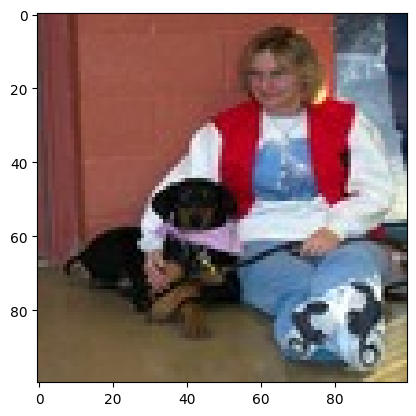

In [48]:
# Make Predictions
random_sample = random.randint(0, test_samples)
prediction = model.predict(X_test[random_sample].reshape(1, 100, 100, 3))
if prediction > 0.5:
    print(f'Prediction: Cat\nconfidence: {prediction[0][0]:.4f} %')
else:
    print(f'Prediction: Dog\nconfidence: {1 - prediction[0][0]:.4f} %')
plt.imshow(X_test[random_sample])